In [0]:
# !pip install --upgrade -q gspread

# import pandas as pd

# from google.colab import auth

# auth.authenticate_user()

# import gspread
# from oauth2client.client import GoogleCredentials


# def get_sheet(title, sheet_name):
#   gc = gspread.authorize(GoogleCredentials.get_application_default())
#   return gc.open(title).worksheet(sheet_name)

In [0]:
# 자료의 요약에 있는 특정 시트를 불러옵니다.
# 1번 row를 0번 인덱스로 읽어오는 데, 0번 인덱스를 컬럼으로 지정해 주도록 했습니다.
# 그러면 스프레드시트에서 봤던 것 처럼 데이터프레임이 생성됩니다.
# def get_df(sheet_name):
#   sheet = get_sheet('자료의 요약', sheet_name)

#   # Create dataframe from the sheet
#   rows = sheet.get_all_values()
#   df = pd.DataFrame.from_records(rows)    

#   df.columns = df.iloc[0]    # 0번째 행은 열 이름
#   df = df.reindex(df.index.drop(0))
#   return df

In [0]:
!pip install --upgrade -q gspread
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [188]:
def get_df(sheet_name, index=None):
    gc = pd.read_excel('자료의 요약.xlsx', sheet_name=sheet_name, header=0, index_col=index )
    df = pd.DataFrame(gc)
    return df

## 통계학

1. **자료 수집과정 설계**:   
모집단 전수조사에는 시간적, 공간적 제약 존재  
-> 표본을 통해 데이터 수집
2. **자료의 요약과 해석**:  
모집단의 특성 요약|  
표본을 통해 모집단의 특성 추론  
-> 통계량이 모수와 어느정도 일치할지에 대한 확률이 필연적으로 고려됨

3. **결론을 이끌어 내거나 일반화**

하는 전체적인 원리와 방법론을 제공

## \[PROS]통계가 필요한 이유
1. 통계학을 적용한 자료는 신뢰성을 가짐
2. 의사결정에 필요한 과학적 근거 자료를 제시
3. 현상을 분석하여 실증자료를 제시
> 연관성 파악, 요약,  예측, 불확실성 해소, 의사결정

## \[CONS]통계의 한계: 표본을 통한 추론통계의 한계
1. 표본에서 결과를 얻음  
-> 표본이 모집단을 잘 대표한다는 확실한 보장이 없음, 정확한 결론을 내리기 어려움
2. 확률을 고려하지 않고서는 무의미
3. 항상 틀릴 가능성 내포

    **의 \[CONS]: ~~자원의~~차원의 저주**  
    모집단을 다 가지고 있는 것이 반드시 항상 좋은 것은 아닐 수 있음:  
    차원(변수)가 증가하면 그것을 표현하기 위한 데이터 양이 기하급수적으로 증가  
    *내용 추가바람*
    변수가 많을 때 줄이는 방법  
    1. na 많은 변수 치우기
    2. 현업과 상의하여 변수 제거
    3. PCA (???)
    4. lasso (???)
    




## 분석 프로세스: SAS의 SEMMA 방법론
1. Sample: Generate a representative sample of the data
2. **Explore**: vis.|basic desc. of the data  
3. Modify: Select var.|transform var.s
4. Model: Use variety of statistical and ML models
5. Assess: Evaluate the accuracy|usefulness of the models

### Exploratory Data Analysis


# 자료의 요약 시트 불러오기

# 혈액형

In [161]:
df_blood = get_df('혈액형')
# 상위 5개의 데이터를 가져옵니다.
print(df_blood.shape)
df_blood.head()

(22, 1)


,혈액형
0,A
1,A
2,B
3,AB
4,O


# 조선왕

In [189]:
df_king = get_df('조선왕', 0)
# 상위 5개의 데이터를 가져옵니다.
print(df_king.shape)
df_king.head()

(27, 2)


,life,period
name,,
태조,73,7
정종,62,2
태종,55,18
세종,53,32
문종,38,2


In [190]:
# 어떤 컬럼이 있고 데이터의 row, column 수, 데이터 타입을 볼 수 있다.
df_king.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, 태조 to 순종
Data columns (total 2 columns):
life      27 non-null int64
period    27 non-null int64
dtypes: int64(2)
memory usage: 648.0+ bytes


In [191]:
df_king.describe()

,life,period
count,27.000000,27.000000
mean,46.111111,19.259259
std,16.678714,15.383789
min,16.000000,1.000000
25%,33.000000,5.500000
50%,48.000000,15.000000
75%,56.000000,29.500000
max,82.000000,52.000000


In [192]:
# 데이터 타입을 int로 변경해 준다.
df_king['life'] = df_king['life'].astype(int)
df_king['period'] = df_king['period'].astype(int)
# 위와 describe() 했을 때의 정보가 다르다. 
# 수치형 데이터 일 때 count, mean, std, min/max, 사분위수를 보여준다.
df_king.describe()

,life,period
count,27.000000,27.000000
mean,46.111111,19.259259
std,16.678714,15.383789
min,16.000000,1.000000
25%,33.000000,5.500000
50%,48.000000,15.000000
75%,56.000000,29.500000
max,82.000000,52.000000


In [193]:
# 결측치를 보고 싶을 때 널값을 구해 본다.
df_king.isnull().sum()

life      0
period    0
dtype: int64

In [194]:
# 가장 오래 집권한 왕순으로 정렬해 보고 상위 5개의 데이터만 본다.
df_king.sort_values(by='period', ascending=False).head(5)

,life,period
name,,
영조,82,52
숙종,59,46
고종,67,43
선조,56,41
중종,56,39


In [195]:
# 평균값만 본다.
df_king.mean()

life      46.111111
period    19.259259
dtype: float64

In [196]:
# 표준편차만 본다.
df_king.std()

life      16.678714
period    15.383789
dtype: float64

In [197]:
# 최대값만 본다. 효종이 나온 이유는 한글 중에 가장 뒤에 있기 때문
# life, period도 각 컬럼에서 최대값
df_king.max()

life      82
period    52
dtype: int32

In [198]:
df_king['period'].max()

52

In [199]:
# 망할놈의 폰트
from matplotlib import font_manager
fonts = []
for x in font_manager.win32InstalledFonts():
    x = x[::-1]
    dot = x.find('.')
    slash = x.find('\\')
    x = x[slash-1:dot:-1]
    fonts += [x]
fonts.sort()
for x in fonts: print (x)

agencyb
agencyr
ahn_b
ahn_l
ahn_m
alger
along
antquab
antquabi
antquai
arial
arialbd
arialbi
ariali
arialn
arialnb
arialnbi
arialni
arialuni
ariblk
arlrdbd
art
bahnschrift
baskvill
bauhs93
bell
bellb
belli
bernhc
bkant
bod_b
bod_bi
bod_blai
bod_blar
bod_cb
bod_cbi
bod_ci
bod_cr
bod_i
bod_pstc
bod_r
bookos
bookosb
bookosbi
bookosi
bradhitc
britanic
brlnsb
brlnsdb
brlnsr
broadw
brushsci
bssym7
calibri
calibrib
calibrii
calibril
calibrili
calibriz
califb
califi
califr
calist
calistb
calistbi
calisti
cambriab
cambriai
cambriaz
candara
candarab
candarai
candaraz
castelar
censcbk
centaur
century
chiller
colonna
comic
comicbd
comici
comicz
consola
consolab
consolai
consolaz
constan
constanb
constani
constanz
coopbl
coprgtb
coprgtl
corbel
corbelb
corbeli
corbelz
cour
courbd
courbi
couri
curlz___
dubai-bold
dubai-light
dubai-medium
dubai-regular
dxrmbxb-kscpc-euc-h
easop
ebrima
ebrimabd
elephnt
elephnti
enbaskvl
enbernf
enblbk
enbodb
enbodbi
enbodbk
enbodbki
enbrodwy
enbrush
encobk
encobki
enco

In [200]:
import matplotlib as mpl
import matplotlib.font_manager as fm

print ('버전: ', mpl.__version__)
print ('설치 위치: ', mpl.__file__)
print ('설정 위치: ', mpl.get_configdir())
print ('캐시 위치: ', mpl.get_cachedir())
fp = 'Python/Anaconda3/lib/site-packages/matplotlib/mpl-data/matplotlibrc' + mpl.matplotlib_fname()
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
print (font_list)

버전:  2.0.2
설치 위치:  C:\Python\Anaconda3\lib\site-packages\matplotlib\__init__.py
설정 위치:  C:\Users\Dellilah\.matplotlib
캐시 위치:  C:\Users\Dellilah\.matplotlib
['c:\\windows\\fonts\\rockb.ttf', 'c:\\windows\\fonts\\oldengl.ttf', 'c:\\windows\\fonts\\gillubcd.ttf', 'c:\\windows\\fonts\\framd.ttf', 'c:\\windows\\fonts\\seguihis.ttf', 'c:\\windows\\fonts\\lhandw.ttf', 'c:\\windows\\fonts\\alger.ttf', 'C:\\WINDOWS\\Fonts\\FRAHVIT.TTF', 'C:\\WINDOWS\\Fonts\\OFFSYM.TTF', 'c:\\windows\\fonts\\brlnsr.ttf', 'C:\\WINDOWS\\Fonts\\COPRGTB.TTF', 'c:\\windows\\fonts\\hancooljazzm.ttf', 'C:\\WINDOWS\\Fonts\\HANCooljazzL.ttf', 'C:\\WINDOWS\\Fonts\\CALIFR.TTF', 'c:\\windows\\fonts\\hynamm.ttf', 'c:\\windows\\fonts\\calibrii.ttf', 'c:\\windows\\fonts\\arialnb.ttf', 'C:\\WINDOWS\\Fonts\\YBUU02.TTF', 'c:\\windows\\fonts\\tahoma.ttf', 'C:\\WINDOWS\\Fonts\\UNI_HSR.TTF', 'c:\\windows\\fonts\\calibrib.ttf', 'c:\\windows\\fonts\\mtcorsva.ttf', 'c:\\windows\\fonts\\yinj05.ttf', 'C:\\WINDOWS\\Fonts\\ANTQUAI.TTF', 'c

C:\Python\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1297: UserWarning: findfont: Font family ['Nanum Gothic Extra Bold'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


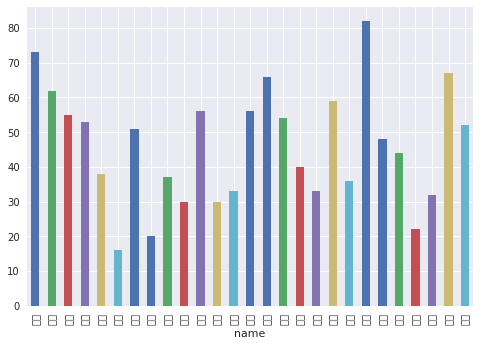

In [217]:
df_king['life'].plot(kind='bar')
plt.rcParams["font.family"] = "Nanum Gothic Extra Bold" # 안돼잖아
plt.show()

C:\Python\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1297: UserWarning: findfont: Font family ['Nanum Gothic Extra Bold'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


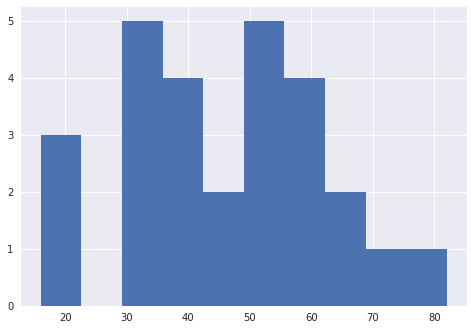

In [218]:
df_king['life'].hist()
plt.show()

C:\Python\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1297: UserWarning: findfont: Font family ['Nanum Gothic Extra Bold'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


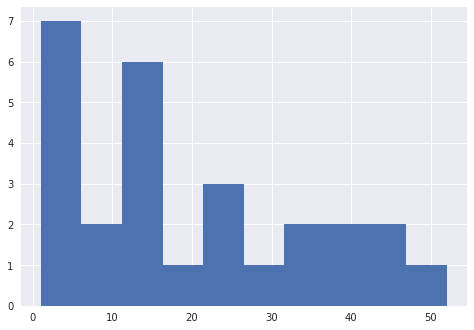

In [219]:
df_king['period'].hist(stacked=True, bins=10)
plt.show()

# 화장지 불량률

In [105]:
df_tp = get_df('화장지 불량률').reset_index(level=0)
df_tp.head()

,화장지 불량 종류
0,크기 불량
1,찢어짐
2,구멍뚫림
3,찢어짐
4,잘못접혀짐


C:\Python\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)
C:\Python\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1297: UserWarning: findfont: Font family ['Nanum Brush Script OTF'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


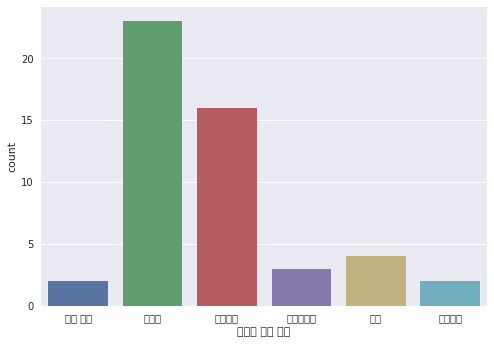

In [128]:
# df_tp_count = df_tp['화장지 불량 종류'].value_counts()

sns.countplot(data=df_tp, x = "화장지 불량 종류")
plt.show()

# GNP

In [220]:
df_gnp = get_df('GNP')
df_gnp.head()

,국가,GNP대비 교육비 지출 비율
0,한국,4.4
1,일본,4.0
2,미국,5.3
3,타이완,5.7
4,캐나다,7.6


# 집 값

In [221]:
df_hp = get_df('집 값')
df_hp.head()

,도심&외각,주택가격
0,outer,24.0
1,outer,21.6
2,outer,34.7
3,outer,33.4
4,outer,36.2


# 포유류

In [222]:
df_mam = get_df('포유류')
df_mam.head()

,몸무게,뇌무게
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5


# 타이타닉

In [223]:
df_titanic = get_df('타이타닉')
print(df_titanic.shape)
# 상위 5개의 데이터를 가져옵니다.
df_titanic.head()

(101, 2)


,Class,생존여부
0,crew,no
1,3등급,no
2,crew,no
3,crew,no
4,1등급,yes


In [224]:
# 어떤 컬럼이 있는지 보여줍니다.
df_titanic.columns

Index(['Class', '생존여부'], dtype='object')

In [225]:
# 컬럼 정보를 보여줍니다.
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
Class    101 non-null object
생존여부     101 non-null object
dtypes: object(2)
memory usage: 1.7+ KB


In [226]:
# 자료의 요약을 보여줍니다.
df_titanic.describe()

,Class,생존여부
count,101,101
unique,4,2
top,crew,no
freq,36,54


In [227]:
df_titanic['Class'].value_counts()

crew    36
3등급     33
2등급     19
1등급     13
Name: Class, dtype: int64

In [228]:
df_titanic['생존여부'].value_counts()

no     54
yes    47
Name: 생존여부, dtype: int64